<a href="https://colab.research.google.com/github/ehdtkd6629/python/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#코로나 통계


In [31]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/1352000/ODMS_COVID_05/callCovid05Api'
para ={'serviceKey' : '00HP68foCda0or18ioQQ+8spPbbgGOogYnz7dgG0/Oq+P0BqCqrIDdfZchAkys4dYXOYRHCAuHtkkm+QQQfO8g==', 'pageNo' : '1', 'numOfRows' : '990', 'apiType' : 'JSON', 'create_dt' : '2022-01-08' }

res = requests.get(url, params=para)
print(res.content)


b'{"pageNo":"1","resultCode":"00","totalCount":13871,"items":[{"criticalRate":"0.01","death":"3","deathRate":"0.05","confCaseRate":"8.05","createDt":"2022-01-08","confCase":"53179","gubun":"0-9"},{"criticalRate":"0.01","death":"13","deathRate":"0.22","confCaseRate":"14.91","createDt":"2022-01-08","confCase":"98569","gubun":"20-29"},{"criticalRate":"0.3","death":"287","deathRate":"4.79","confCaseRate":"14.44","createDt":"2022-01-08","confCase":"95445","gubun":"50-59"},{"criticalRate":"4.16","death":"1645","deathRate":"27.48","confCaseRate":"5.98","createDt":"2022-01-08","confCase":"39526","gubun":"70-79"},{"criticalRate":"1.01","death":"942","deathRate":"15.74","confCaseRate":"14.09","createDt":"2022-01-08","confCase":"93129","gubun":"60-69"},{"criticalRate":"0.9","death":"3079","deathRate":"51.44","confCaseRate":"51.95","createDt":"2022-01-08","confCase":"343420","gubun":"\xeb\x82\xa8\xec\x84\xb1"},{"criticalRate":"0.92","death":"2907","deathRate":"48.56","confCaseRate":"48.05","create

In [32]:
import json
json_file = json.loads(res.text)

In [33]:
import pandas as pd
from pandas import json_normalize

df = json_normalize(json_file['items'])
df 

,criticalRate,death,deathRate,confCaseRate,createDt,confCase,gubun
0,0.01,3,0.05,8.05,2022-01-08,53179,0-9
1,0.01,13,0.22,14.91,2022-01-08,98569,20-29
2,0.3,287,4.79,14.44,2022-01-08,95445,50-59
3,4.16,1645,27.48,5.98,2022-01-08,39526,70-79
4,1.01,942,15.74,14.09,2022-01-08,93129,60-69
5,0.9,3079,51.44,51.95,2022-01-08,343420,남성
6,0.92,2907,48.56,48.05,2022-01-08,317595,여성
7,0.08,82,1.37,14.66,2022-01-08,96928,40-49
8,14.06,2975,49.70,3.2,2022-01-08,21156,80 이상
9,0.04,39,0.65,14.59,2022-01-08,96428,30-39


In [2]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (22.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and dir

Text(0.5, 1.0, '성별 연령별 코로나로 인한 사망자 수')

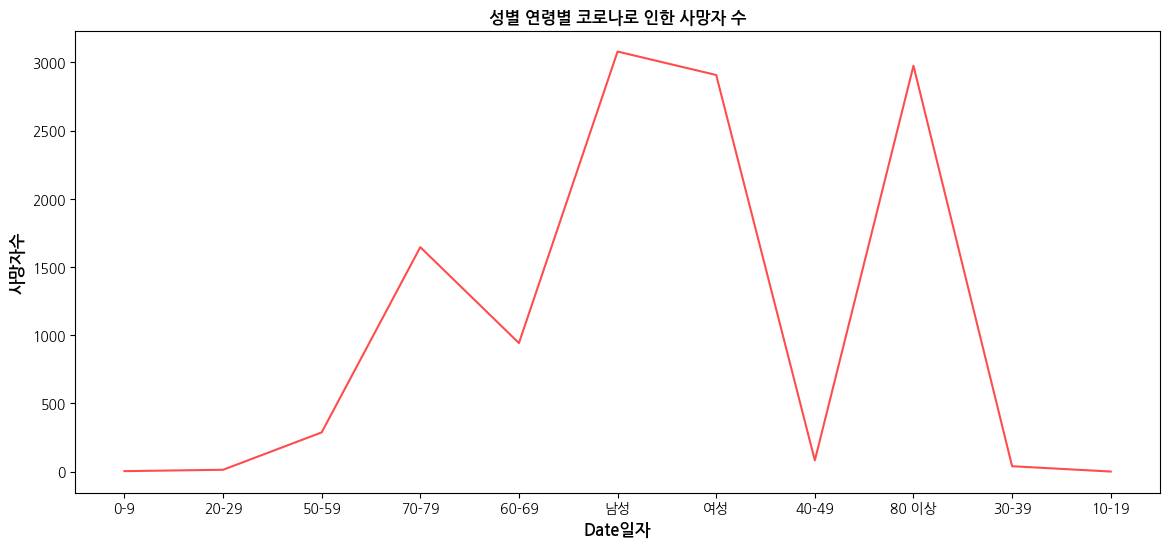

In [35]:
#한글 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도

#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df['createDt'] = pd.to_datetime(df['createDt'])
df['death'] = pd.to_numeric(df['death'], downcast='float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['gubun'],df['death'],color='r',lw=1.5, alpha=0.7)

ax.set_ylabel('사망자수', fontweight='bold', fontsize=12)
ax.set_xlabel('Date일자',fontweight='bold', fontsize=12)
ax.set_title('성별 연령별 코로나로 인한 사망자 수',fontweight='bold',fontsize=12)

Text(0.5, 1.0, '성별 연령별 코로나로 인한 확진자 수')

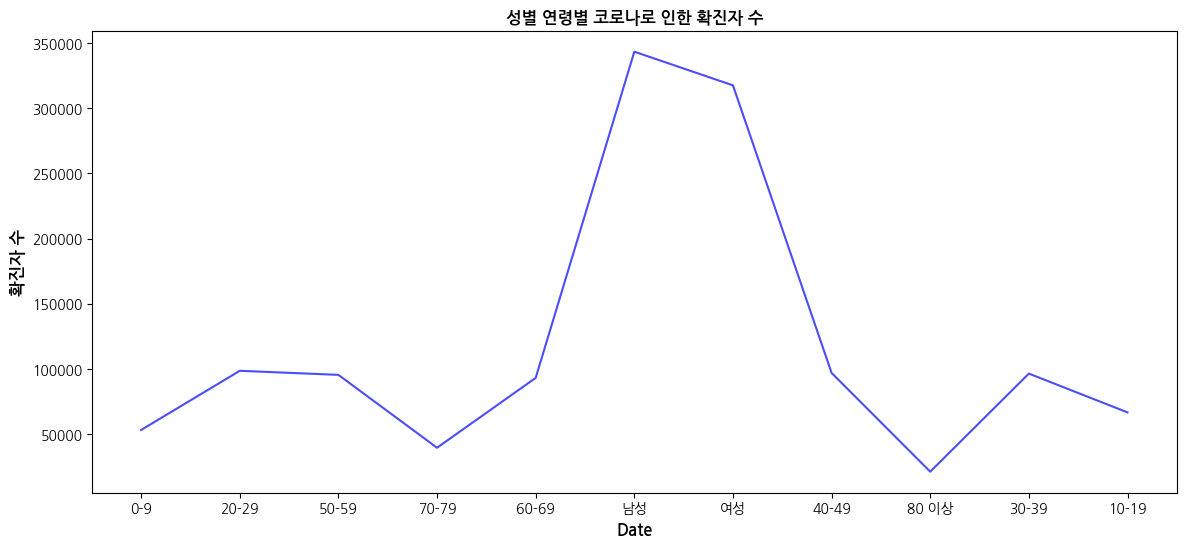

In [43]:
df['confCase'] = pd.to_numeric(df['confCase'], downcast='float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['gubun'],df['confCase'],color='b',lw=1.5, alpha=0.7)
ax.set_ylabel('확진자 수', fontweight='bold', fontsize=12)
ax.set_xlabel('Date',fontweight='bold', fontsize=12)
ax.set_title('성별 연령별 코로나로 인한 확진자 수',fontweight='bold',fontsize=12)

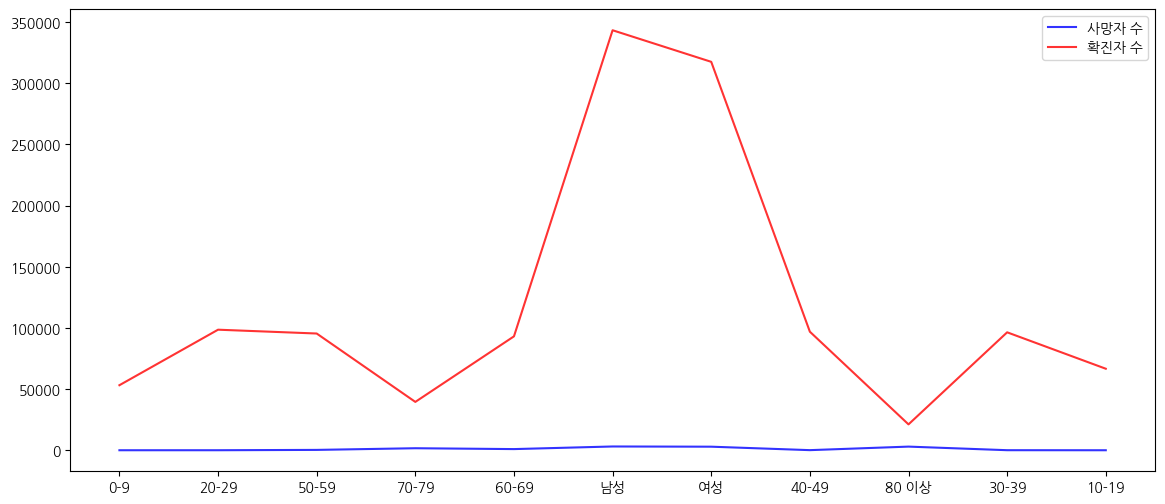

In [42]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)
ax.plot(df['gubun'],df['death'],color='b',lw=1.5, alpha=0.8, label='사망자 수')
ax.plot(df['gubun'],df['confCase'],color='r',lw=1.5, alpha=0.8, label='확진자 수')
ax.legend()
plt.show()